In [ ]:
pip install datgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.6 MB 6.8 MB/s 
     - 668.3 MB 139.3 MB/s
     |████████████████████████████████| 462 kB 45.7 MB/s 
  Created wheel for datgan: filename=datgan-2.1.9-py3-none-any.whl size=60498 sha256=81850db4f33348c9c1463e1ac9e71a84d54e5f27943e03506d909fe21b743e47
  Stored in directory: /root/.cache/pip/wheels/31/18/be/c9f5a1db0d74fc750da6ca1d66b0f432d1f97ca418da61eacb
  Created wheel for pynverse: filename=pynverse-0.1.4.4-py3-none-any.whl size=6363 sha256=93256773b84ecc976dd8ed51f5eb83755ba3f1dee02ae556369ff0aadea0e947
  Stored in directory: /root/.cache/pip/wheels/06/eb/74/006b76fdd8229ed3767fef546c825c2924f1def2d023929d9d
Successfully built datgan pynverse
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorfl

Lode The Data from CSV

In [ ]:
import pandas as pd

def load_dataset(benchmark, algo):
  real_data_orig=pd.read_csv(drive_location+algo+".csv")
  #print(real_data_orig)
  #real_data_selected_col = real_data_orig.drop(columns=['sys','sysname','arch','PS','executable'])
  if (benchmark == "SPEC2006" or benchmark == "SPEC2017"):
    real_data_selected_col=real_data_orig.drop(columns=['arch','ld_shared_by_cores','l2_shared_by_cores','no_of_threads','system_name','bus_speed_qpi','bus_speed_dmi','l1_ins_assoc','l1_data_assoc','l2_assoc','l3_assoc','raw_bus_speed','converted_bus_speed','ddr_type','runtime'])
  elif (benchmark == "NPB"):
    real_data_selected_col=real_data_orig.drop(columns=['sys','sysname','arch','l1d_assoc','l1d_cache_lines','l1d_shared_by_threads','l2_assoc','l2_cache_lines','l2_shared_by_threads','l3_assoc','l3_cache_lines','l3_shared_by_threads','PS','runtime','executable','system'])
  else:
    real_data_selected_col=real_data_orig.drop(columns=['sys','arch','l1d_assoc','l1d_cache_lines','l1d_shared_by_threads','l2_assoc','l2_cache_lines','l2_shared_by_threads','l3_assoc','l3_cache_lines','l3_shared_by_threads','runtime'])
  #print(real_data_selected_col)
  real_data_selected_col.dropna(inplace=True)
  #print(real_data_selected_col)
  return real_data_selected_col

In [ ]:
drive_location = r"/content/drive/My Drive/SITesting/"

benchmark = "SPEC2017"
algo = "603.bwaves_s"
algo_fname = "603.bwaves_s"

spec_float_benchmark_list = ["SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006"]
spec_float_algo_list = ["603.bwaves_s","607.cactuBSSN_s","619.lbm_s","621.wrf_s","627.cam4_s","628.pop2_s","638.imagick_s","644.nab_s","649.fotonik3d_s","654.roms_s","416.gamess","433.milc","434.zeusmp","435.gromacs","437.leslie3d","447.dealII","450.soplex","453.povray","454.calculix"]
spec_float_algo_fname_list = ["603.bwaves_s","607.cactuBSSN_s","619.lbm_s","621.wrf_s","627.cam4_s","628.pop2_s","638.imagick_s","644.nab_s","649.fotonik3d_s","654.roms_s","416.gamess","433.milc","434.zeusmp","435.gromacs","437.leslie3d","447.dealII","450.soplex","453.povray","454.calculix"]

spec_int_benchmark_list = ["SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2017","SPEC2006","SPEC2006","SPEC2006","SPEC2006","SPEC2006"]
spec_int_algo_list = ["600.perlbench_s","602.gcc_s","605.mcf_s","620.omnetpp_s","623.xalancbmk_s","625.x264_s","631.deepsjeng_s","641.leela_s","648.exchange2_s","657.xz_s","401.bzip2","456.hmmer","458.sjeng","462.libquantum","473.astar"]
spec_int_algo_fname_list = ["600.perlbench_s","602.gcc_s","605.mcf_s","620.omnetpp_s","623.xalancbmk_s","625.x264_s","631.deepsjeng_s","641.leela_s","648.exchange2_s","657.xz_s","401.bzip2","456.hmmer","458.sjeng","462.libquantum","473.astar"]

npb_other_benchmark_list = ["NPB","NPB","NPB","NPB","OTHER","OTHER","OTHER"]
npb_other_algo_list = ["npb_ep","npb_mg","npb_sp","npb_sp-mz","matmul","montecarlo","quicksort"]
npb_other_algo_fname_list = ["npb_ep","npb_mg","npb_sp","npb_sp-mz","matmul","montecarlo","quicksort"]


# Assign variable with which list is to be processed
benchmark_list = npb_other_benchmark_list
algo_list = npb_other_algo_list
algo_fname_list = npb_other_algo_fname_list
#for algo_idx, algo in enumerate(algo_list):

pd.set_option("display.max_columns", None)
# Load and preprocess real dataset
real_data = load_dataset(benchmark, algo)
real_data.to_csv(drive_location+algo+"_real_data_DATGAN.csv",index=False)

In [ ]:
import datgan
import numpy as np

In [ ]:
df=real_data
print(df)

      cpu_clock     isa  l1_size  l2_size  l3_size  num-cpus   mem_type  \
0           2.7  X86_64       32     1024    49152        36  PC4-2666V   
1           2.1  X86_64       32     1024    77824        56  PC4-2666V   
2           2.5  X86_64       32     1024    77824        56  PC4-2666V   
3           3.0  X86_64       32     1024    49152        36  PC4-2666V   
4           2.7  X86_64       32     1024    49152        36  PC4-2666V   
...         ...     ...      ...      ...      ...       ...        ...   
1981        2.1  X86_64       32     1024    71680        52  PC4-2666V   
1982        2.1  X86_64       32     1024   155648       112  PC4-2666V   
1983        3.0  X86_64       32     1024    98304        72  PC4-2666V   
1984        2.5  X86_64       32     1024   155648       112  PC4-2666V   
1985        2.1  X86_64       32     1024   143360       104  PC4-2666V   

      mem_clock  mem_size  
0          2666       768  
1          2666       768  
2          2666

In [ ]:
data_info={
    'cpu_clock':{
        'type':'continuous',
        'discrete':False
    }
}

for c in df.columns:
  if c not in data_info.keys():
    data_info[c]={
        'type':'categorical'
    } 

In [ ]:
batch_size=100
output_folder='./output/'

In [ ]:
from datgan.datgan import DATGAN
datgan=DATGAN(output=output_folder, batch_size=batch_size, num_epochs=200)

In [ ]:
datgan.preprocess(df, data_info, preprocessed_data_path='./encoded_data')

Preprocessed data have been loaded!


In [ ]:
datgan.fit(df, data_info, preprocessed_data_path='./encoded_data')

Preprocessed data have been loaded!
Start training DATGAN with the WGAN loss (14/06/2022 14:35:23).
Restored models from epoch 100.


Training DATGAN: 100%|██████████| 100/100 [04:03<00:00,  2.44s/it]

DATGAN has finished training (14/06/2022 14:39:27) - Training time: 04 minutes and 03 seconds


In [ ]:
sample=datgan.sample(len(df))
sample.to_csv(drive_location+algo+"_generated_data_DATGAN.csv",index=False)

Sampling from DATGAN: 100%|██████████| 1986/1986 [00:03<00:00, 601.01it/s]


In [ ]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


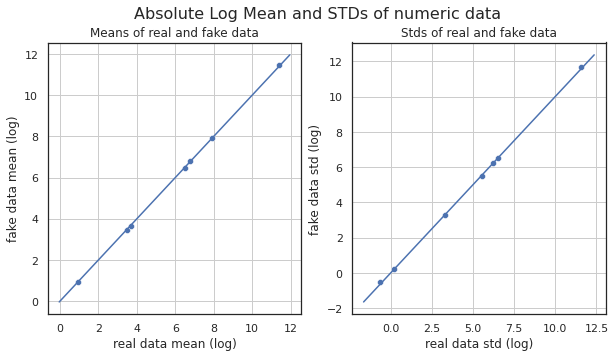

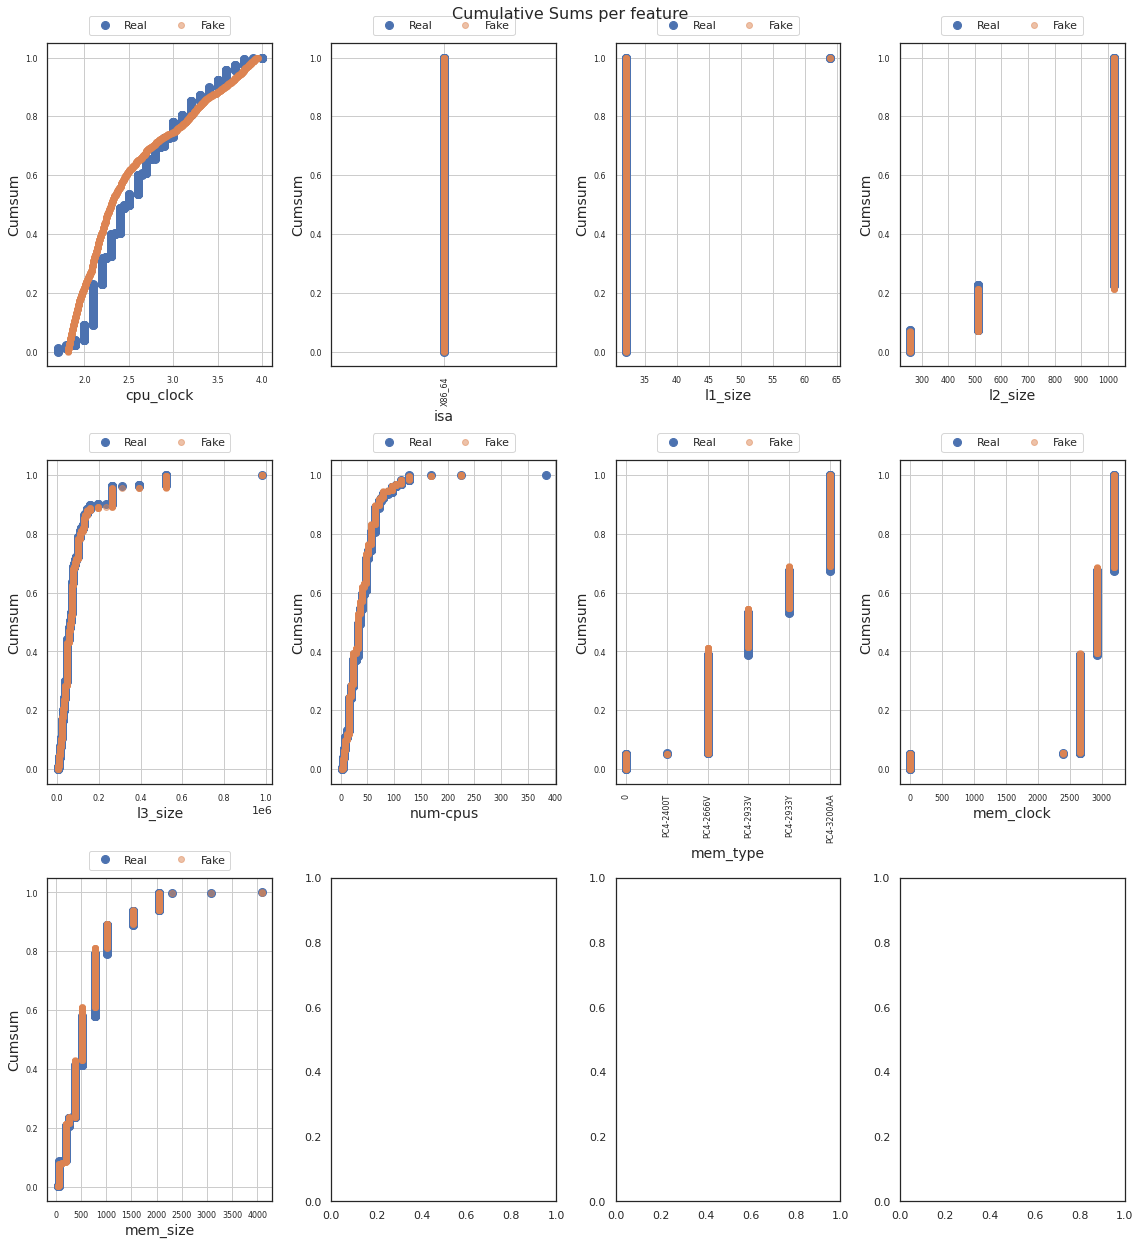

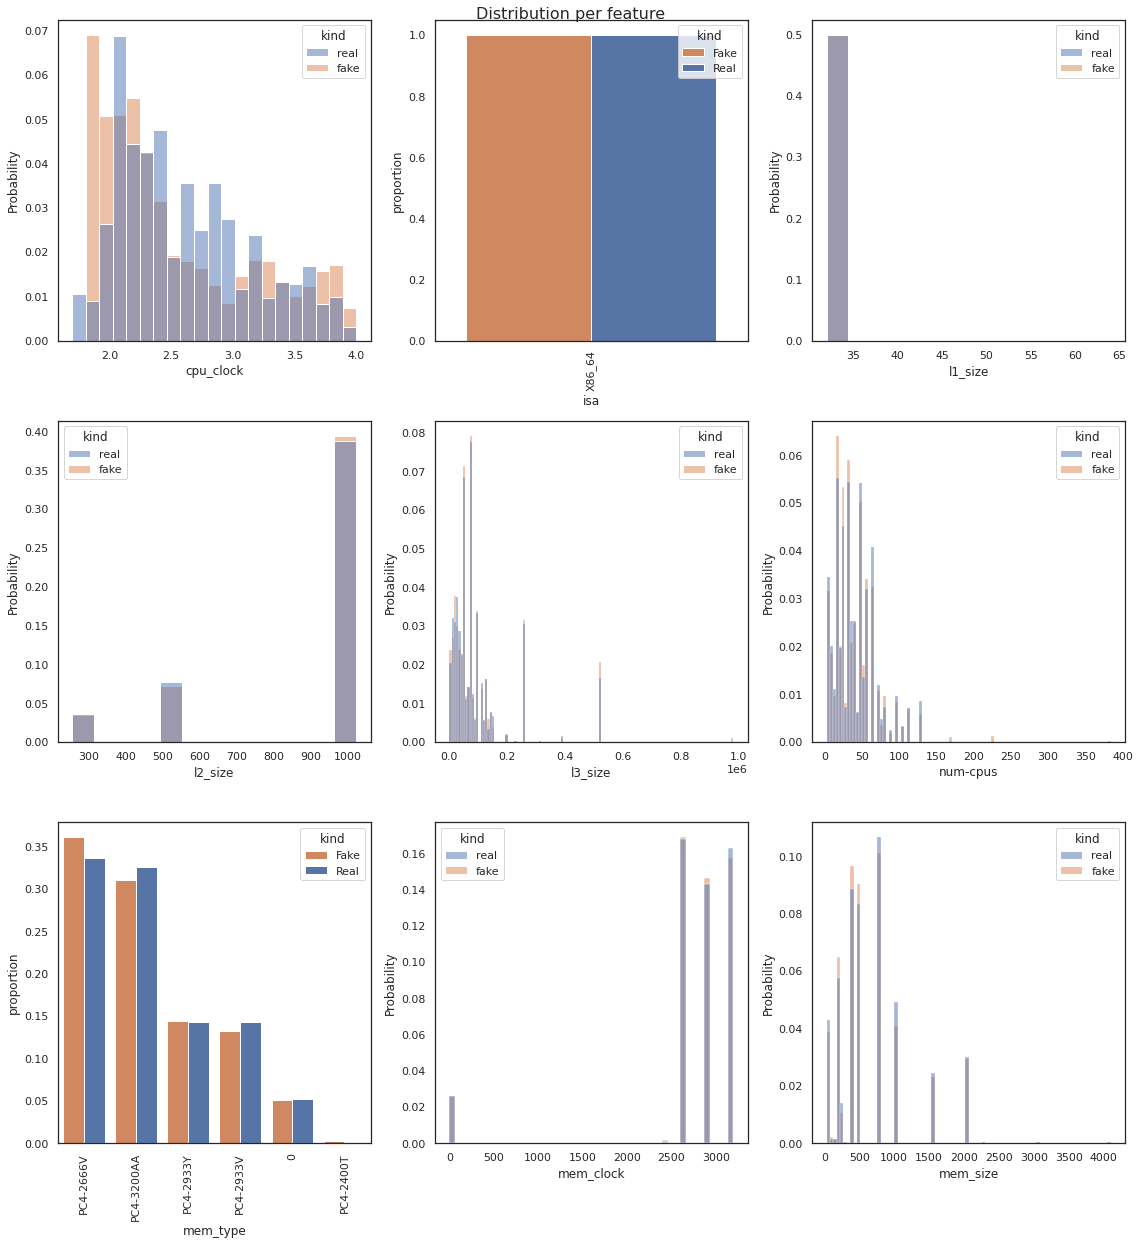

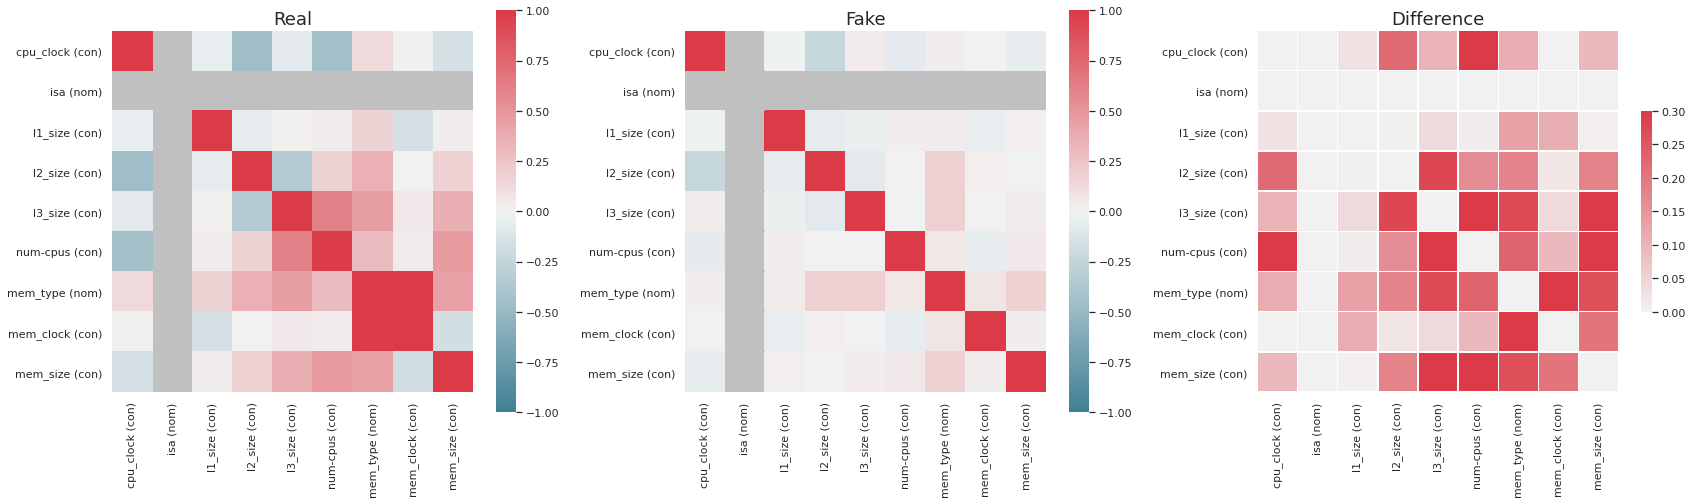

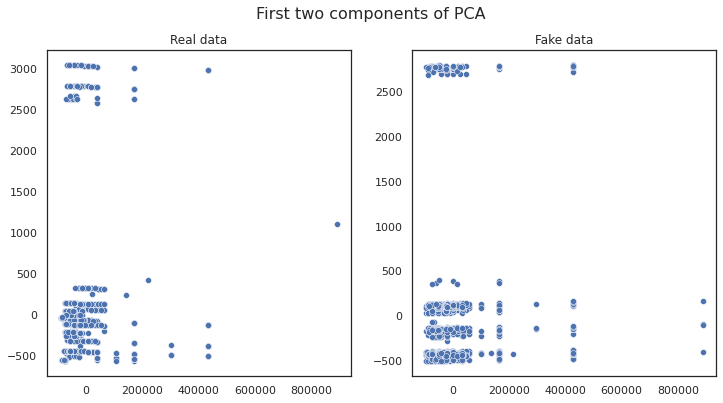

In [ ]:
table_evaluator =  TableEvaluator(df, new_data)

table_evaluator.visual_evaluation()